Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Load the LFW (Labeled Faces in the Wild) dataset

In [2]:
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw.images  # Face images
y = lfw.target  # Labels

# Normalize pixel values to [0,1]
X = X / 255.0

# Reshape for CNN input (adding channel dimension)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
y = to_categorical(y)  # One-hot encode labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Augmentation using ImageDataGenerator

In [3]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Visualizing augmented images

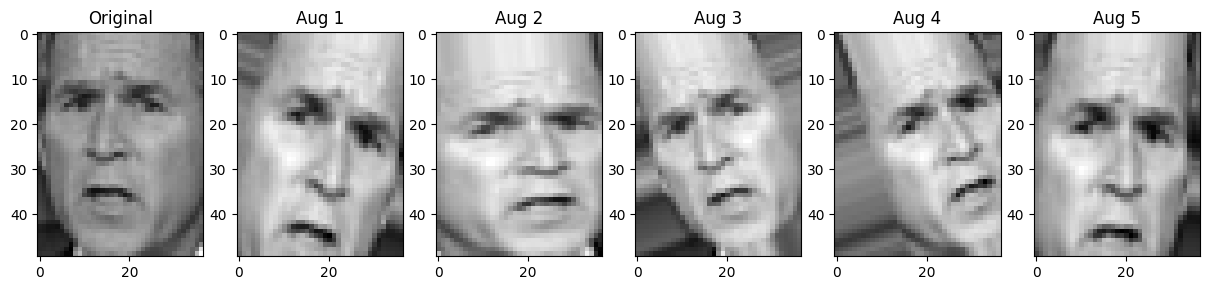

In [4]:
augmented_images = [data_gen.random_transform(X_train[0]) for _ in range(5)]
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
axes[0].imshow(X_train[0].squeeze(), cmap='gray')
axes[0].set_title('Original')
for i, img in enumerate(augmented_images):
    axes[i+1].imshow(img.squeeze(), cmap='gray')
    axes[i+1].set_title(f'Aug {i+1}')
plt.show()

CNN Model for Face Classification

In [5]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularization through dropout
        Dense(y.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train CNN without augmentation

In [6]:
model_no_aug = create_cnn_model()
history_no_aug = model_no_aug.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4147 - loss: 1.5278 - val_accuracy: 0.4649 - val_loss: 1.4057
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4469 - loss: 1.4520 - val_accuracy: 0.4649 - val_loss: 1.4131
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.4608 - loss: 1.4316 - val_accuracy: 0.4649 - val_loss: 1.4023
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4593 - loss: 1.4191 - val_accuracy: 0.4649 - val_loss: 1.4034
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4666 - loss: 1.4123 - val_accuracy: 0.4649 - val_loss: 1.4073
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.4425 - loss: 1.4538 - val_accuracy: 0.4649 - val_loss: 1.4034
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4688 - loss: 1.4132 - val_accuracy: 0.4649 - val_loss: 1.4003
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4698 - loss: 1.4247 - val_accuracy: 0.4649 - 

Train CNN with augmentation

In [7]:
model_aug = create_cnn_model()
history_aug = model_aug.fit(data_gen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4207 - loss: 1.5073 - val_accuracy: 0.4649 - val_loss: 1.4334
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4632 - loss: 1.4486 - val_accuracy: 0.4649 - val_loss: 1.4026
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4537 - loss: 1.4460 - val_accuracy: 0.4649 - val_loss: 1.4018
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4532 - loss: 1.4511 - val_accuracy: 0.4649 - val_loss: 1.4073
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4375 - loss: 1.4712 - val_accuracy: 0.4649 - val_loss: 1.4008
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4561 - loss: 1.4409 - val_accuracy: 0.4649 - val_loss: 1.4047
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.4694 - loss: 1.4212 - val_accuracy: 0.4649 - val_loss: 1.4195
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.4791 - loss: 1.4058 - val_accuracy: 0.4649 - val_loss: 1

Plot Training and Validation Accuracy

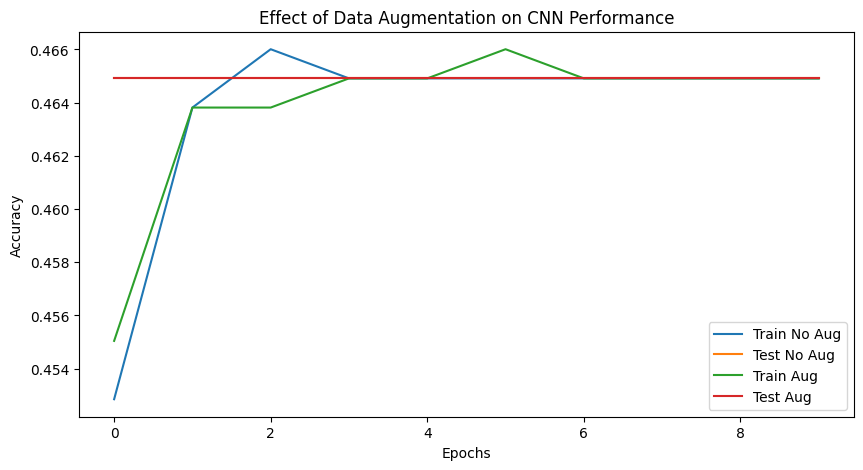

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history_no_aug.history['accuracy'], label='Train No Aug')
plt.plot(history_no_aug.history['val_accuracy'], label='Test No Aug')
plt.plot(history_aug.history['accuracy'], label='Train Aug')
plt.plot(history_aug.history['val_accuracy'], label='Test Aug')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Data Augmentation on CNN Performance')
plt.show()

- Data Augmentation helps prevent overfitting by creating more diverse training examples.

- Dropout is used as another form of regularization in the CNN model.
- We compare training with and without augmentation to visualize performance differences.


    Regularization Formula:
    L2 Regularization: L(w) = Loss + (lambda/2) * ||w||^2  (reduces large weights)
    
    Dropout: Randomly drops units during training to prevent reliance on specific neurons.